Carregamento, limpeza e tratamento de dados

In [3]:
#Importando bibliotecas
import pandas as pd


In [4]:
# Lista de arquivos a serem lidos
arquivos = [
    r"dados/despesa_ceaps_2008.csv",
    r"dados/despesa_ceaps_2009.csv",
    r"dados/despesa_ceaps_2010.csv",
    r"dados/despesa_ceaps_2011.csv",
    r"dados/despesa_ceaps_2012.csv",
    r"dados/despesa_ceaps_2013.csv",
    r"dados/despesa_ceaps_2014.csv",
    r"dados/despesa_ceaps_2015.csv",
    r"dados/despesa_ceaps_2016.csv",
    r"dados/despesa_ceaps_2017.csv",
    r"dados/despesa_ceaps_2018.csv",
    r"dados/despesa_ceaps_2019.csv",
    r"dados/despesa_ceaps_2020.csv",
    r"dados/despesa_ceaps_2021.csv",
    r"dados/despesa_ceaps_2022.csv"
]


In [5]:
# Lista para armazenar os DataFrames lidos
dataframes = []


In [6]:
# Loop para ler cada arquivo e armazenar seu DataFrame correspondente na lista
for arquivo in arquivos:
    df = pd.read_csv(arquivo, encoding='cp1252', sep=';', skiprows=1)
    dataframes.append(df)
    

In [7]:
# Concatenando os DataFrames da lista em um único DataFrame
ceaps_total = pd.concat(dataframes, ignore_index=True)

In [8]:
#Verificando linhas aleatórias do DataFrame
ceaps_total.sample(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
246110,2018,11,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",15.369.957/0001-87,AUTO POSTO PREMIUM LTDA.,000002015,08/11/2018,NaN,80,2109266.0
281621,2020,1,ROGÉRIO CARVALHO,"Locomoção, hospedagem, alimentação, combustíve...",32.864.795/0020-35,Rede de Postos Presidente Ltda - (Distrito Ind...,5962,04/02/2020,NaN,150,2140709.0
104656,2013,4,JADER BARBALHO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM LINHAS AEREAS S/A,9572466808314,11/04/2013,Trecho voado pelo Servidor José Adalvânio Sant...,"1073,17",731621.0
195053,2016,8,WALDEMIR MOKA,"Locomoção, hospedagem, alimentação, combustíve...",00.543.213/0004-02,DISBRAVE COMBUSTIVEIS LTDA,042322,15/08/2016,Aquisição de combustível para veículos utiliza...,"155,98",2046416.0
288098,2021,8,ELIANE NOGUEIRA,"Locomoção, hospedagem, alimentação, combustíve...",07.976.147/0020-23,Movida Aluguel de Carros,NaN,14/02/2022,Locação veículos,"2791,19",2174577.0


In [9]:
#Removendo coluna 'DOCUMENTO'
ceaps_total.drop('DOCUMENTO', axis=1, inplace=True)
ceaps_total.drop('COD_DOCUMENTO', axis=1, inplace=True)

In [10]:
#Verificando valores nulo
ceaps_total.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF              True
FORNECEDOR            True
DATA                  True
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
dtype: bool

In [11]:
#Tratando valores nulo
ceaps_total.CNPJ_CPF = ceaps_total.CNPJ_CPF.fillna('NAO INFORMADO')
ceaps_total.FORNECEDOR = ceaps_total.FORNECEDOR.fillna('NAO INFORMADO')
ceaps_total.DATA = ceaps_total.DATA.fillna('NAO INFORMADO')
ceaps_total.DETALHAMENTO = ceaps_total.DETALHAMENTO.fillna('NAO INFORMADO')

In [12]:
ceaps_total['FORNECEDOR'].replace({
    'ADRIA VIAGENS E TURISMO': 'ADRIA VIAGENS E TURISMO LTDA',
    'Adria Viagens e Turismo Ltda': 'ADRIA VIAGENS E TURISMO LTDA'
}, inplace=True)

In [13]:
# Convertendo colunas de data para o formato datetime
ceaps_total['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')

In [14]:
#Verificando coluna 'TIPO_DESPESA'
ceaps_total['TIPO_DESPESA'].value_counts()

TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   133066
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  68763
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            62625
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      25838
Divulgação da atividade parlamentar                                                                                                                                                

In [15]:
# Dicionário de mapeamento
mapa_despesas = {
    'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'Aluguel',
    'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Despesas gerais',
    'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratações',
    'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem e alimentação',
    'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens',
    'Divulgação da atividade parlamentar': 'Divulgação',
    'Serviços de Segurança Privada': 'Segurança'
}

In [16]:
# Substituir os valores na própria coluna 'TIPO_DESPESA' usando o dicionário de mapeamento
ceaps_total['TIPO_DESPESA'] = ceaps_total['TIPO_DESPESA'].map(mapa_despesas)

In [17]:
# Preencher valores NaN com um valor padrão ou deixar os valores originais
ceaps_total['TIPO_DESPESA'] = ceaps_total['TIPO_DESPESA'].fillna('Outros')

Não foi possivel converter a coluna em float, pois existem valores de reembolso com centavos representados pela vírgula

In [19]:
#Tratando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace('.', '')
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace(',', '.')

In [20]:
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace('\r\n', '', regex=False)
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.strip()

In [21]:
# Convertendo a coluna 'VALOR_REEMBOLSADO' para numérico
ceaps_total['VALOR_REEMBOLSADO'] = pd.to_numeric(ceaps_total['VALOR_REEMBOLSADO'], errors='coerce')

In [22]:
#Verificando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'].describe()

count    3.179630e+05
mean     1.031730e+03
std      5.682034e+03
min     -1.500000e+03
25%      1.000000e+02
50%      2.835000e+02
75%      1.000000e+03
max      2.016557e+06
Name: VALOR_REEMBOLSADO, dtype: float64

In [23]:
#Verificando valores negativos
ceaps_total[ceaps_total['VALOR_REEMBOLSADO']<0]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
152315,2015,2,GLADSON CAMELI,Aluguel,63.600.449/0001-00,Arras Adm. de Bens Imóveis Limpeza e Conservaç...,NaT,Contrato de locação de Imóvel comercial do esc...,-1500.0
163225,2015,1,RANDOLFE RODRIGUES,Passagens,02.012.862/0001-60,Tam Linhas Aereas S/A,NaT,"9572100929351 - R$ 1.298,93 (1º bilhete emitid...",-9.0
201499,2017,5,DÁRIO BERGER,Contratações,73.228.876/0001-63,TV CLIPAGEM LTDA. EPP.,NaT,Despesa com Monitoramento de Informação Jornal...,-243.4


In [24]:
#Convertendo os valores negativos para valores absolutos
ceaps_total['VALOR_REEMBOLSADO'] = abs(ceaps_total['VALOR_REEMBOLSADO'])

In [25]:
#Verificando valores maiores que 1 Milhão
ceaps_total[ceaps_total['VALOR_REEMBOLSADO']>1000000]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
150213,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,NaT,"469,53",2014675.0
150220,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,NaT,"460,45",2016557.0


Erro de digitação, foi digitado os valores nos campos errados

In [27]:
ceaps_total.loc[[150213],'VALOR_REEMBOLSADO']=ceaps_total.loc[[150213],'VALOR_REEMBOLSADO'].replace(2014675.0, 469.53)
ceaps_total.loc[[150220],'VALOR_REEMBOLSADO']=ceaps_total.loc[[150220],'VALOR_REEMBOLSADO'].replace(2016557.0, 460.45)

In [28]:
# Verificando se há valores NaN restantes
print(df['VALOR_REEMBOLSADO'].isna().sum())

0


In [29]:
# Verificando se a conversão foi feita corretamente
print(ceaps_total['VALOR_REEMBOLSADO'].dtype)

float64


In [30]:
ceaps_total.loc[[150213,150220]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
150213,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,NaT,"469,53",469.53
150220,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,NaT,"460,45",460.45


In [31]:
ceaps_total.sample(10)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
155788,2015,6,JORGE VIANA,"Locomoção, hospedagem e alimentação",33.469.172/0022-92,SENAC - SERVIÇO NACIONAL DE APRENDIZAGEM COMER...,NaT,Despesa com refeição e bebidas não alcoólicas.,171.20
177930,2016,8,FLEXA RIBEIRO,Aluguel,04.949.426/0001-47,ENGEPLAN ENGENHARIA E PLANEJAMENTO LTDA,NaT,DESPESA COM ALUGUEL DE IMÓVEL QUE SERVE O SENA...,1708.00
38714,2011,4,ANA RITA,"Locomoção, hospedagem e alimentação",03.003.758/0001-71,q.luxo self service ltda,NaT,NAO INFORMADO,52.89
270309,2020,3,ACIR GURGACZ,Divulgação,10.575.238/0001-07,VOZ DE RONDÔNIA PUBLICIDADES E PROPAGANDA LTD...,NaT,Despesa com divulgação da atividade parlamentar,1000.00
264123,2019,10,PAULO ROCHA,Passagens,16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,NaT,"Companhia Aérea: GOL, Localizador: YLMVRM. Pas...",1650.78
301852,2022,8,ANGELO CORONEL,"Locomoção, hospedagem e alimentação",32.204.439/0001-22,Rio Center Hotel,NaT,Hospedagem de servidor em acompanhamento da at...,240.00
253777,2019,8,FABIANO CONTARATO,"Locomoção, hospedagem e alimentação",07.286.731/0001-94,SILT SELF SERVICE EIRELI ME,NaT,DESPESA COM ALIMENTAÇÃO,36.80
79846,2012,5,LÍDICE DA MATA,"Locomoção, hospedagem e alimentação",02.409.000/0002-56,Posto Pituba,NaT,NAO INFORMADO,121.98
276592,2020,8,JOSÉ MARANHÃO,Divulgação,27.084.469/0001-02,PORTAL GOMES SERVIÇOS DE MARKETING E PUBLICIDA...,NaT,NAO INFORMADO,2000.00
159160,2015,5,LINDBERGH FARIAS,Aluguel,12.967.332/0001-29,CENTRO RIO ADMINISTRAÇÃO DE IMOVEIS LT,NaT,NAO INFORMADO,9846.27


Análise descritiva

In [33]:
#Importando biblioteca
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Função para adicionar rótulos com valores nos gráficos de barra
def add_labels_bar(plot):
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=10, color='black', rotation=0)

In [35]:
# Função para adicionar rótulos com valores nos gráficos de dispersão
def add_labels_scatter(x, y, data):
    for i in range(len(data)):
        plt.text(x[i], y[i], f'{data[i]:.2f}', fontsize=9, ha='right')

Valor total de reembolsos CEAPS pagos no período de 2008 a 2022?

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


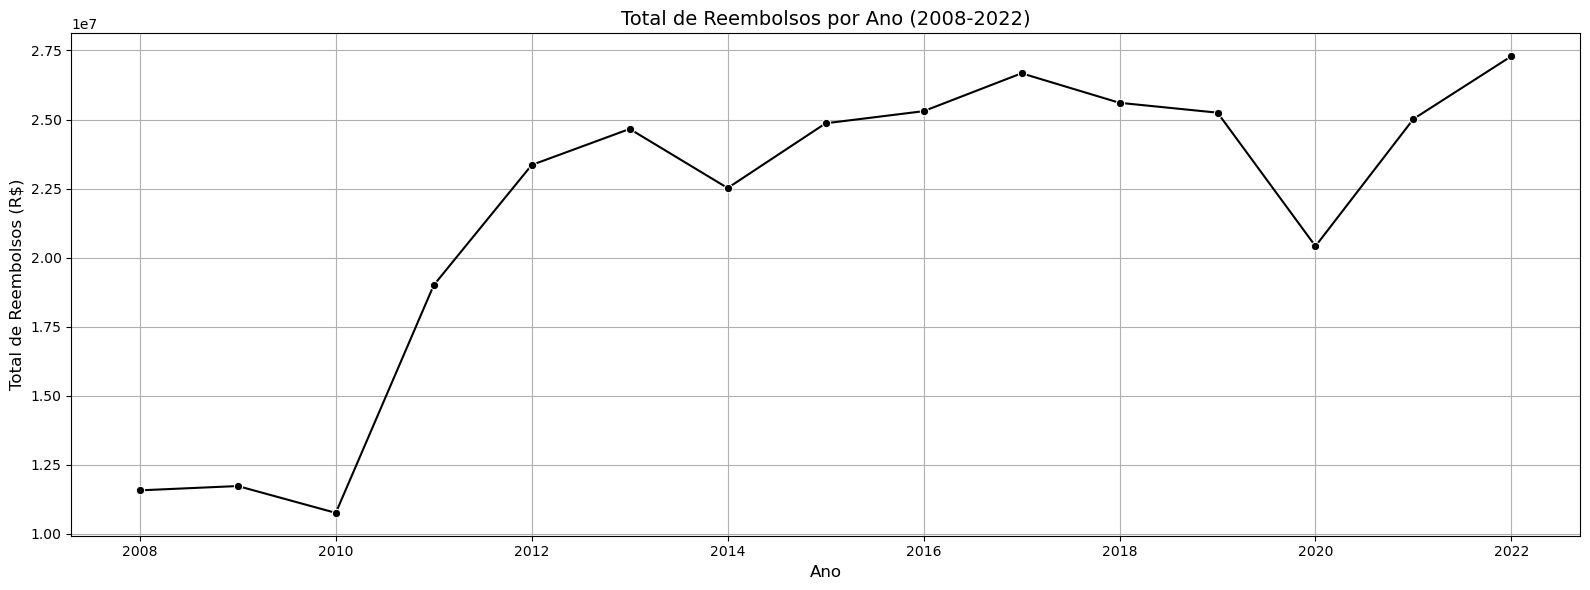

In [37]:
# Agrupando por ano e somando os valores reembolsados
reembolsos_por_ano = ceaps_total.groupby('ANO')['VALOR_REEMBOLSADO'].sum().reset_index()

# Configurações do gráfico
plt.figure(figsize=(16, 6))
sns.lineplot(data=reembolsos_por_ano, x='ANO', y='VALOR_REEMBOLSADO', marker='o', color='k')

plt.title('Total de Reembolsos por Ano (2008-2022)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Reembolsos (R$)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('imgs/total_reembolsos_por_ano.png')
plt.show()


10 Senadores que mais receberam reembolso CEAPS entre 2008 a 2022?

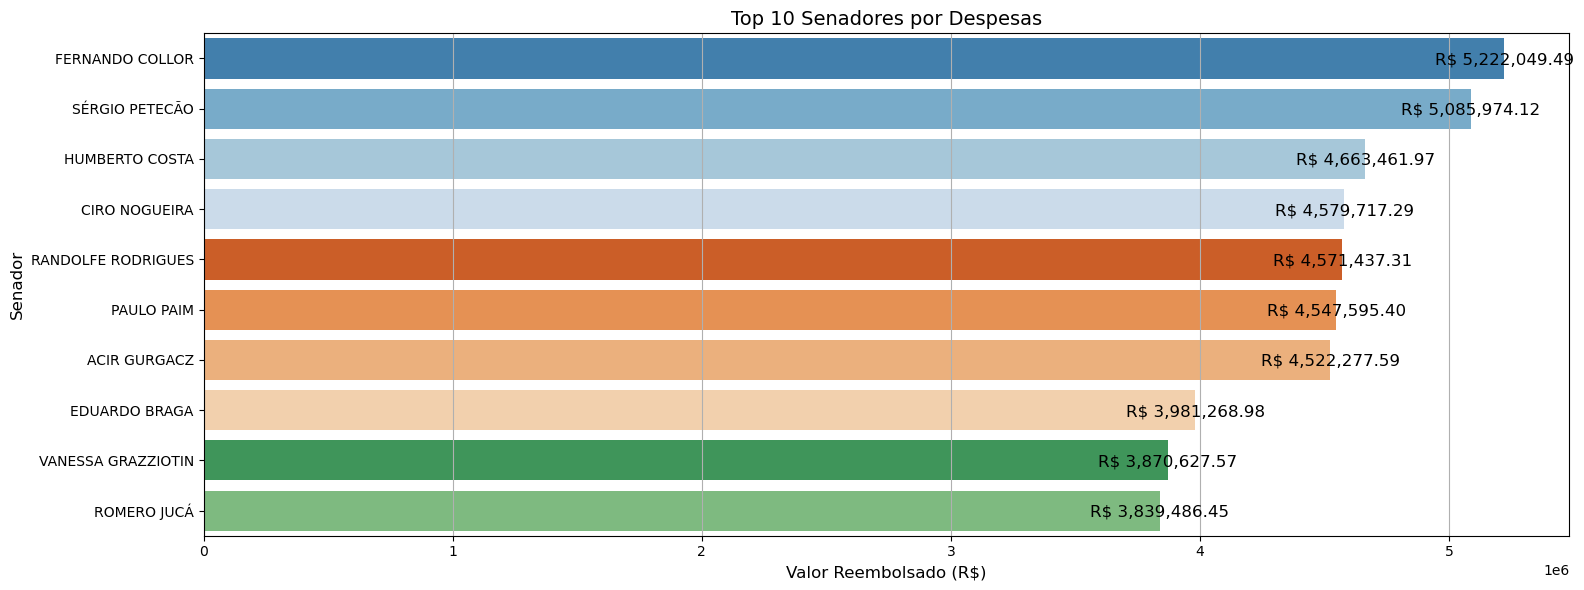

In [39]:
# Agrupando por senador e somando as despesas
despesas_por_senador = ceaps_total.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=despesas_por_senador, x='VALOR_REEMBOLSADO', y='SENADOR', palette='tab20c')

# Adicionando rótulos com os valores corretos e ajustando a posição
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width():,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center_baseline', fontsize=12, color='black')

# Configurações adicionais do gráfico
plt.title('Top 10 Senadores por Despesas', fontsize=14)
plt.xlabel('Valor Reembolsado (R$)', fontsize=12)
plt.ylabel('Senador', fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('imgs/top_senadores.png')
plt.show()

Valor de reembolsos por tipo de despesa?

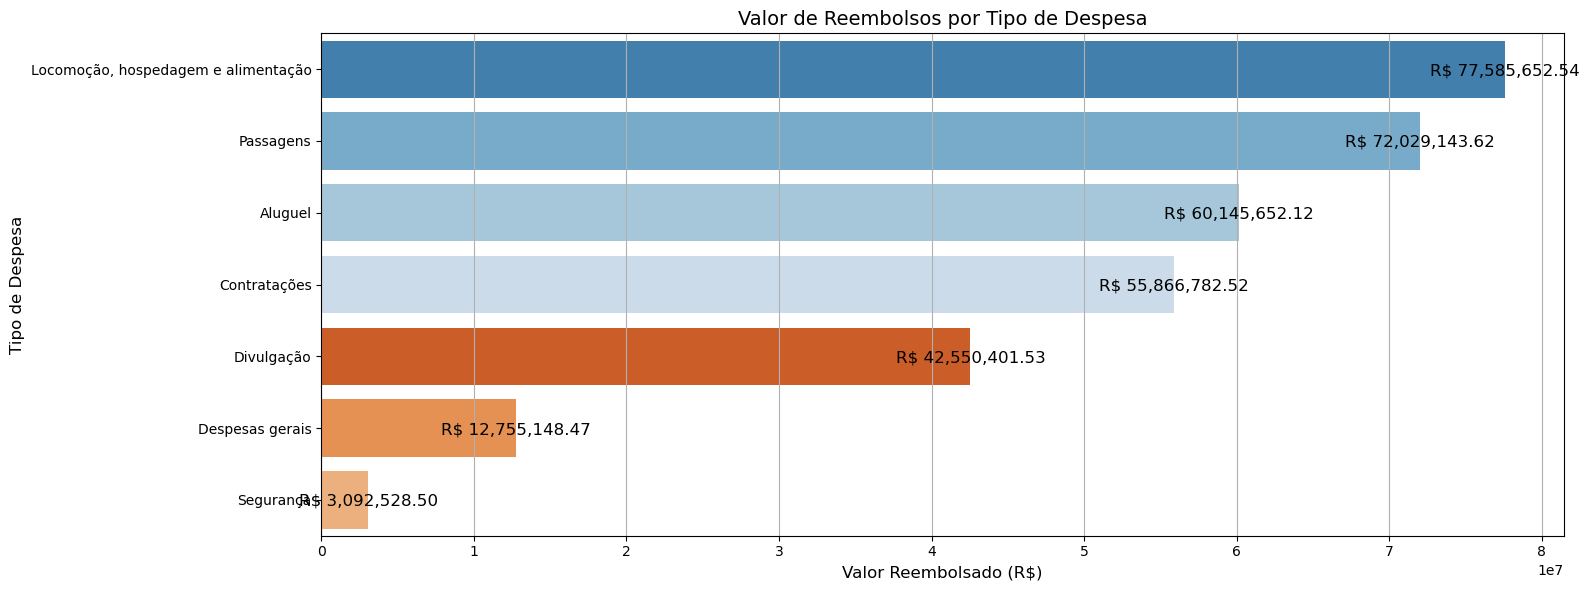

In [41]:
# Agrupando por tipo de despesa e somando os valores reembolsados
despesas_por_tipo = ceaps_total.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenando os dados pelo valor reembolsado
despesas_por_tipo = despesas_por_tipo.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=despesas_por_tipo, x='VALOR_REEMBOLSADO', y='TIPO_DESPESA', palette='tab20c')

# Adicionando rótulos com os valores corretos e ajustando a posição
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width():,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center_baseline', fontsize=12, color='black')

# Configurações adicionais do gráfico
plt.title('Valor de Reembolsos por Tipo de Despesa', fontsize=14)
plt.xlabel('Valor Reembolsado (R$)', fontsize=12)
plt.ylabel('Tipo de Despesa', fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('imgs/valor_por_tipo_despesa.png')
plt.show()

Valor de reembolso declarado dividido por fornecedor

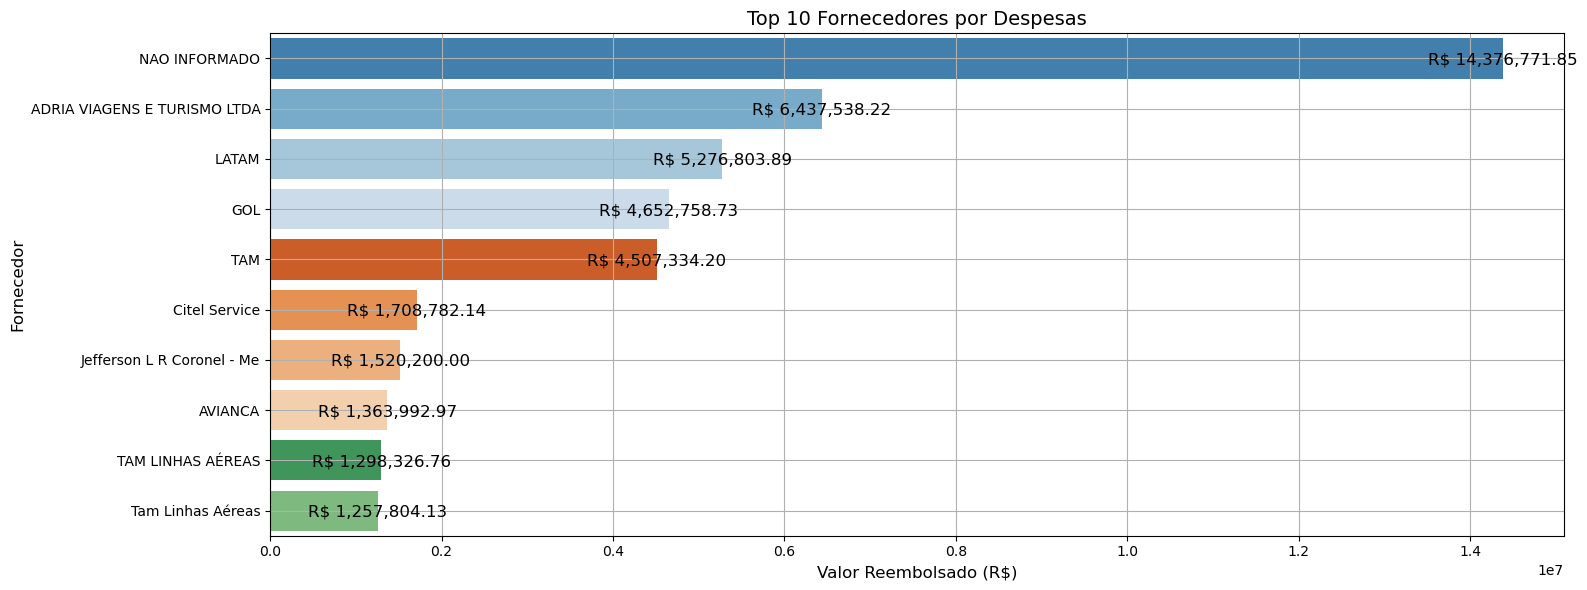

In [43]:
# Gráfico dos Principais Fornecedores
despesas_por_fornecedor = ceaps_total.groupby('FORNECEDOR')['VALOR_REEMBOLSADO'].sum().nlargest(10).reset_index()
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=despesas_por_fornecedor, x='VALOR_REEMBOLSADO', y='FORNECEDOR', palette='tab20c')

# Adicionando rótulos
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width():,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center_baseline', fontsize=12, color='black')

plt.title('Top 10 Fornecedores por Despesas', fontsize=14)
plt.xlabel('Valor Reembolsado (R$)', fontsize=12)
plt.ylabel('Fornecedor', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('imgs/top_fornecedores.png')
plt.show()


Senadores que não informaram o fornecedor

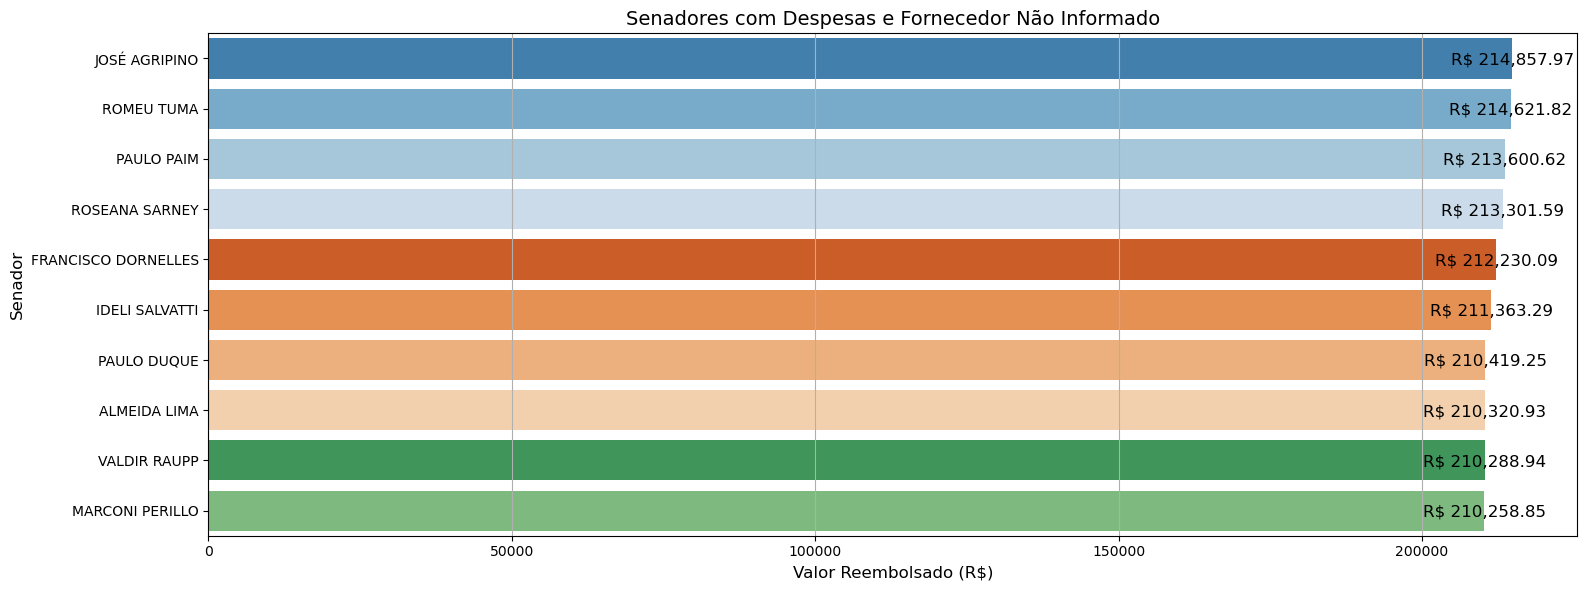

In [45]:
# Filtrando os senadores que não informaram o fornecedor
senadores_sem_fornecedor = ceaps_total[ceaps_total['FORNECEDOR'] == 'NAO INFORMADO']

# Agrupando por senador e somando as despesas
despesas_por_senador = senadores_sem_fornecedor.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=despesas_por_senador, x='VALOR_REEMBOLSADO', y='SENADOR', palette='tab20c')

# Adicionando rótulos com os valores corretos e ajustando a posição
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width():,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center_baseline', fontsize=12, color='black')

# Configurações adicionais do gráfico
plt.title('Senadores com Despesas e Fornecedor Não Informado', fontsize=14)
plt.xlabel('Valor Reembolsado (R$)', fontsize=12)
plt.ylabel('Senador', fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('imgs/senadores_sem_fornecedor.png')
plt.show()
